# AYUSH BINJRAJKA

In [11]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#importing datasets and setting column index as id
data=pd.read_csv("C://Users//Nancy//Desktop//Sparks//Kmeans-model--main//iris.csv",index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
#to check the size of the dataset
data.shape

(150, 5)

In [26]:
# to check for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
#defining the predictors
X=data.iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [29]:
#finding the optimal no of clusters for KMeans Classification Using Elbow Methods
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist #To calculate euclidian distance from cluster_center 

In [32]:
distor=[]
K=range(1,17)
for k in K:
    kmodel=KMeans(n_clusters=k)
    kmodel.fit(X)
    distor.append(sum(np.min(cdist(X,kmodel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

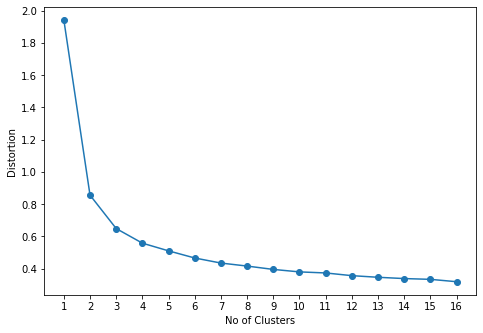

In [34]:
#representing the graph between no of clusters and distortions
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(0,17))
ax.set_xlabel('No of Clusters')
ax.set_ylabel('Distortion')
ax.plot(K,distor,marker='o')
plt.show()

As there is a sharp increase in distortions on the left side of a point where number is cluster is 3.Hence we can easily say that optimal no.of cluster is "3" for the given datasets.

In [35]:
#By Using 3 number of clusters we are training the KMeans Model
model=KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [36]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [38]:
#for labelling the column(Species) to the crossponding columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Species=le.fit_transform(data.Species)
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [41]:
#To check the accuracy level of model
from sklearn.metrics import accuracy_score
accuracy_score(data.Species,model.labels_)

0.09333333333333334

In [42]:
# Visualising the clusters On the first two columns
import numpy as np 

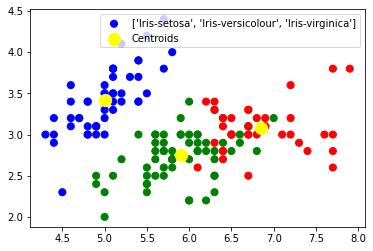

In [43]:
color=np.array(['red','blue','green'])
labels_name=['Iris-setosa','Iris-versicolour','Iris-virginica']
plt.scatter(x=data['SepalLengthCm'],y=data['SepalWidthCm'],s=50,c=color[model.labels_],label=labels_name)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,c='yellow',label='Centroids')
plt.legend()
plt.show()